<a href="https://colab.research.google.com/github/nohjuhyeon/study_data_analytics/blob/main/docs/quests/CDAs/CDA_mixed_unVar_second.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 한글 폰트 설치

In [1]:
### 한글 폰트 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치 후 colab의 경우 Runtime > Restart session 필요

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

## matplotlib 시각화

In [33]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy.stats as stats
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용

## load dataset

In [3]:
import pandas as pd
df_fruit = pd.read_csv("/content/fruitstore_saleshistory.csv")
df_fruit

,공급일자,요일,공급월,공급주차,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,주소-구,주소-동,성별,연령,연령대,구매금액,구매매장,반품_원거래일자,구매시각
0,2018-01-02,화,1,1,272369856,정상회원,과실,과일,사과,사과/유(1.5kg),1.0,수지구,풍덕천동,여,45.0,40대,22207,매장C,NaN,10:04
1,2018-01-02,화,1,1,1506656256,정상회원,채소,버섯,느타리버섯,느타리버섯(300g),1.0,수지구,풍덕천동,여,36.0,30대이하,4977,매장C,NaN,10:05
2,2018-01-02,화,1,1,1506656256,정상회원,축산물,알,유정란,유정란/매장용(10알/국내산),1.0,수지구,풍덕천동,여,36.0,30대이하,7083,매장C,NaN,10:05
3,2018-01-02,화,1,1,1023108864,정상회원,반찬,두부/유부,두부,연두부(100g),1.0,수지구,풍덕천동,여,36.0,30대이하,766,매장C,NaN,10:08
4,2018-01-02,화,1,1,1476143616,정상회원,간식,빵,"식빵, 식사대용",아침빵(240g/8개)/매장,1.0,수지구,풍덕천동,여,34.0,30대이하,4403,매장C,NaN,10:09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705566,2018-06-30,토,6,26,146297344,정상회원,수산,건어물,멸치류,국물멸치(300g),1.0,수지구,성복동,여,51.0,50대,9189,매장A,NaN,17:56
705567,2018-06-30,토,6,26,1532985472,정상회원,수산,해조,미역/다시마,자른다시마(100g),1.0,수지구,동천동,여,63.0,60대,5169,매장A,NaN,14:37
705568,2018-06-30,토,6,26,1532985472,정상회원,반찬,두부/유부,두부,두부(1모:420g),2.0,수지구,동천동,여,63.0,60대,7466,매장A,NaN,14:37
705569,2018-06-30,토,6,26,1209779776,정상회원,간식,과자,스낵,하늘바다새우(60g),1.0,수지구,동천동,여,41.0,40대,3542,매장A,NaN,18:04


In [27]:
df_fruit.isnull().sum()

공급일자             0
요일               0
공급월              0
공급주차             0
회원번호             0
조합원상태            0
물품대분류            0
물품중분류            0
물품소분류            0
물품명              0
구매수량             0
주소-구             0
주소-동             0
성별               5
연령              33
연령대             33
구매금액             0
구매매장             0
반품_원거래일자    694337
구매시각             0
dtype: int64

In [31]:
df_fruit_pivot = pd.pivot_table(data = df_fruit, index=['회원번호','요일'],values=['구매금액'], aggfunc='sum')
df_fruit_pivot= df_fruit_pivot.reset_index().set_index('회원번호')
df_fruit_pivot

,요일,구매금액
회원번호,,
18764160,금,59538
18764160,목,14933
18764160,수,187995
18764160,월,166554
18764160,일,73896
...,...,...
1670620864,금,285247
1670620864,목,120035
1670620864,수,166460


## 요일별 고객의 구매 금액 분산이 이분산을 보이는지?
- 요일(범주형)에 따른 고객의 구매 금액(연속형) 분산을 비교하여, 특정 요일에 구매 금액의 변동성이 큰지 분석합니다.

## 분석 내용 : 요일에 따른 고객의 구매 금액에 차이가 있는가?
- 귀무 가설 : 요일에 따른 고객의 구매 금액에 차이가 없다.
- 대립 가설 : 요일에 따른 고객의 구매 금액에 차이가 있다.

## 정규분포 확인 : 연속형
- 구매금액 : 비정규분포

<Axes: xlabel='구매금액', ylabel='Count'>

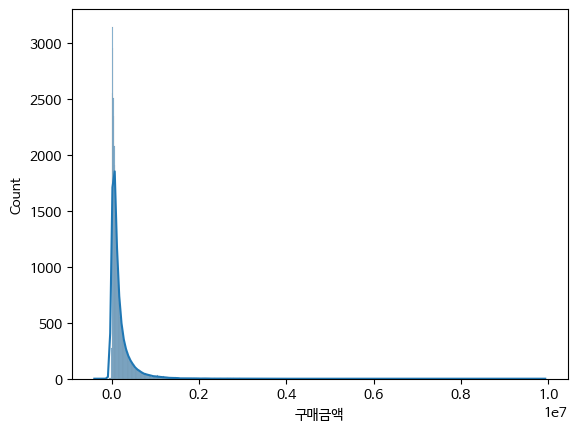

In [35]:
sns.histplot(data=df_fruit_pivot, x = '구매금액', kde=True)

In [34]:
# stats.anderson을 사용한 정규 분포 검정
result = stats.anderson(df_fruit_pivot['구매금액'])
print('Test Statistic: %.3f' % result.statistic)
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print('%.1f%% 수준에서 데이터는 정규 분포를 따름 (검정 통계량 %.3f < 임계값 %.3f)' % (sl, result.statistic, cv))
    else:
        print('%.1f%% 수준에서 데이터는 정규 분포를 따르지 않음 (검정 통계량 %.3f >= 임계값 %.3f)' % (sl, result.statistic, cv))

Test Statistic: 4609.398
15.0% 수준에서 데이터는 정규 분포를 따르지 않음 (검정 통계량 4609.398 >= 임계값 0.576)
10.0% 수준에서 데이터는 정규 분포를 따르지 않음 (검정 통계량 4609.398 >= 임계값 0.656)
5.0% 수준에서 데이터는 정규 분포를 따르지 않음 (검정 통계량 4609.398 >= 임계값 0.787)
2.5% 수준에서 데이터는 정규 분포를 따르지 않음 (검정 통계량 4609.398 >= 임계값 0.918)
1.0% 수준에서 데이터는 정규 분포를 따르지 않음 (검정 통계량 4609.398 >= 임계값 1.092)


### 연속형 데이터가 비정규 분포이고, 범주형 집단이 3개 이상 : Kruskal Test

In [38]:
# 필요 항목 확인
day_list = df_fruit_pivot['요일'].value_counts().index.to_list()
day_list

['월', '화', '수', '목', '금', '토', '일']

In [40]:
series_list = list()
for day in day_list:
  condition = f"요일 == '{day}'"
  series_frequency = df_fruit_pivot.query(condition)['구매금액'] # condition에 따른 amount series 작성
  series_list.append(series_frequency)
  print(series_frequency.isnull().sum())
series_list

0
0
0
0
0
0
0


[회원번호
 18764160       166554
 18942336        86627
 19627200       635233
 19996544       585332
 20235968        85575
                ...   
 1605904000      17804
 1605963392       7083
 1670400000    6704340
 1670606016     213361
 1670620864      34460
 Name: 구매금액, Length: 6494, dtype: int64,
 회원번호
 18764160        55039
 18942336        40586
 19627200       404275
 19727424       257298
 19996544       342013
                ...   
 1603966336      78778
 1604376512      46042
 1604393216      78645
 1606401408     118790
 1670400000    5728735
 Name: 구매금액, Length: 6425, dtype: int64,
 회원번호
 18764160       187995
 18942336       309462
 19627200       827412
 19727424        70642
 19996544       703083
                ...   
 1604731008      87775
 1604866496      50829
 1605495680     173583
 1670400000    6552504
 1670620864     166460
 Name: 구매금액, Length: 6359, dtype: int64,
 회원번호
 18764160        14933
 18792000        70642
 18942336       494302
 19627200       470395
 1

In [42]:
stats.kruskal(*series_list)

KruskalResult(statistic=179.97137609755168, pvalue=3.4409697902599636e-36)

In [43]:
round(3.4409697902599636e-36,6)

0.0

### 분석 내용 : 요일에 따른 고객의 구매 금액의 차이가 있는가
- 귀무 가설 : 요일에 따른 고객의 구매 금액의 차이가 없다.
- 대립 가설 : 요일에 따른 고객의 구매 금액의 차이가 있다.


## 분석 결과
- 통계 결론 : 대립 가설 성립
- 사실 결론 : 요일에 따른 고객의 구매 금액의 차이가 있다.